# Exercise 04 : Histogram

In [29]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [ ]:
connection = sqlite3.connect("../../data/checking-logs.sqlite")

## use another type of visualization – histograms. This time, we will not use the averages. We will use the absolute numbers of commits and will compare them during working days and weekends.

- analyze only the users and not the admins
- create two lists of values (for working days and for weekends) for the histogram input
- the figsize is still the same, you can choose the fontsize as well as the color palette
- use a level of transparency for the histogram in front equal to 0.7

In [31]:
commit_df = pd.io.sql.read_sql("SELECT timestamp as date FROM checker WHERE uid LIKE 'user_%'", connection)
commit_df['date']=pd.to_datetime(commit_df['date']) ##alt: parse_dates='timestamp' as a parameter above
commit_df

,date
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [32]:
commit_df['hour']=commit_df['date'].dt.hour
commit_df['day']=commit_df['date'].dt.day
commit_df['weekday']=commit_df['date'].dt.weekday
commit_df['WorkingOrNot']=commit_df['weekday'].apply(lambda x: 'working_day' if x<5 else 'weekend')
commit_df['count'] = 0
commit_df

,date,hour,day,weekday,WorkingOrNot,count
0,2020-04-17 05:19:02.744528,5,17,4,working_day,0
1,2020-04-17 05:22:35.249331,5,17,4,working_day,0
2,2020-04-17 05:22:45.549397,5,17,4,working_day,0
3,2020-04-17 05:34:14.691200,5,17,4,working_day,0
4,2020-04-17 05:34:24.422370,5,17,4,working_day,0
...,...,...,...,...,...,...
3202,2020-05-21 20:19:06.872761,20,21,3,working_day,0
3203,2020-05-21 20:22:41.785725,20,21,3,working_day,0
3204,2020-05-21 20:22:41.877806,20,21,3,working_day,0
3205,2020-05-21 20:37:00.129678,20,21,3,working_day,0


In [33]:
working_days = commit_df[commit_df['WorkingOrNot'] == 'working_day'].reset_index()
working_days

,index,date,hour,day,weekday,WorkingOrNot,count
0,0,2020-04-17 05:19:02.744528,5,17,4,working_day,0
1,1,2020-04-17 05:22:35.249331,5,17,4,working_day,0
2,2,2020-04-17 05:22:45.549397,5,17,4,working_day,0
3,3,2020-04-17 05:34:14.691200,5,17,4,working_day,0
4,4,2020-04-17 05:34:24.422370,5,17,4,working_day,0
...,...,...,...,...,...,...,...
2032,3202,2020-05-21 20:19:06.872761,20,21,3,working_day,0
2033,3203,2020-05-21 20:22:41.785725,20,21,3,working_day,0
2034,3204,2020-05-21 20:22:41.877806,20,21,3,working_day,0
2035,3205,2020-05-21 20:37:00.129678,20,21,3,working_day,0


In [34]:
weekend = commit_df[commit_df['WorkingOrNot'] == 'weekend'].reset_index()
weekend

,index,date,hour,day,weekday,WorkingOrNot,count
0,23,2020-04-18 07:56:45.408648,7,18,5,weekend,0
1,24,2020-04-18 13:36:53.971502,13,18,5,weekend,0
2,25,2020-04-18 13:42:35.482008,13,18,5,weekend,0
3,26,2020-04-18 13:51:22.291271,13,18,5,weekend,0
4,27,2020-04-18 13:53:17.230725,13,18,5,weekend,0
...,...,...,...,...,...,...,...
1165,3088,2020-05-17 22:23:05.744415,22,17,6,weekend,0
1166,3089,2020-05-17 22:23:11.078664,22,17,6,weekend,0
1167,3090,2020-05-17 22:23:11.220412,22,17,6,weekend,0
1168,3091,2020-05-17 22:25:15.051189,22,17,6,weekend,0


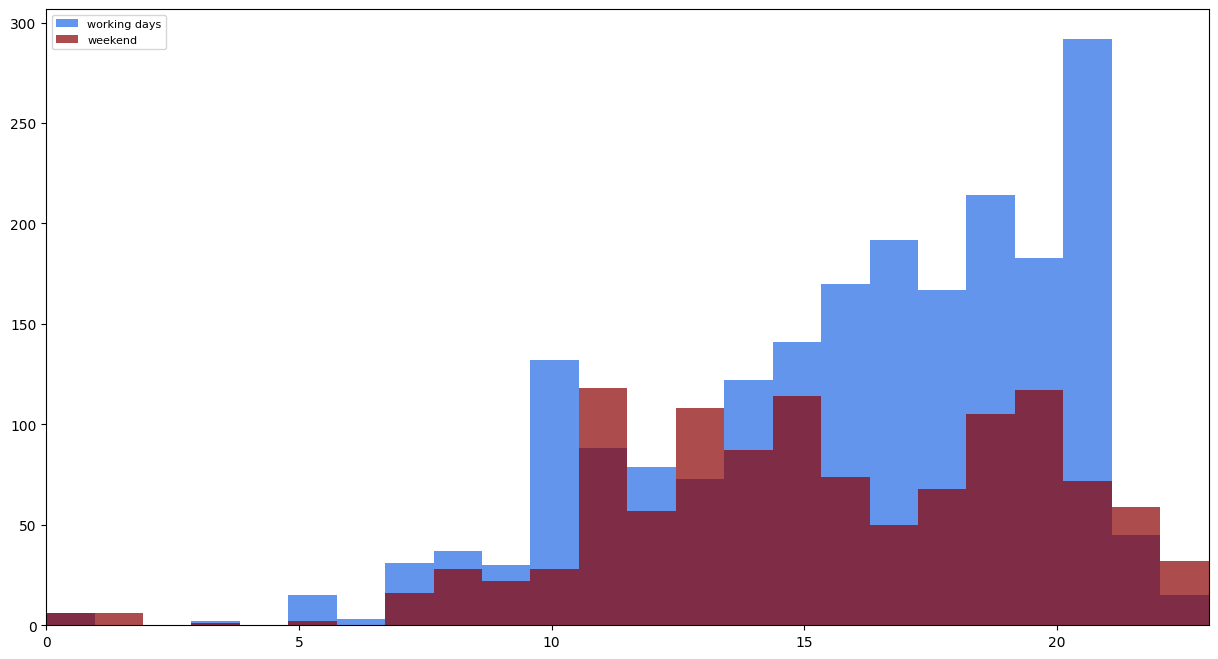

In [35]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(working_days['hour'], bins=24, color='cornflowerblue', label='working days')
ax.hist(weekend['hour'], bins=24, color='darkred', alpha=0.7, label='weekend')
ax.set_xlim(0, 23)
ax.legend(loc='upper left', fontsize='8')
plt.show()

## Are there hours when the total number of commits was higher on weekends than on working days? In your answer, put the top-4 examples.

In [36]:

working_counts = working_days['hour'].value_counts().sort_index().reindex(range(24), fill_value=0)
weekend_counts = weekend['hour'].value_counts().sort_index().reindex(range(24), fill_value=0)

weekend_higher = weekend_counts > working_counts
diff = (weekend_counts - working_counts)[weekend_higher].sort_values(ascending=False)

top_4_hours = diff.head(4)
top_4_hours

hour
13    35
11    30
23    17
22    14
Name: count, dtype: int64

## 11, 13, 22, 23 hours

In [37]:
connection.close()